#### 测试LogicJudge库

In [2]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
from src.LogicJudge import * 

In [3]:
##### 生成一个包含n-1个命题的逻辑表达式
def Makesample(n):
    string = "("
    for i in range(n-2):
        string += "(" + chr(i + ord('a')) + "-->" + chr(i + 1 + ord('a')) + ")&"
    string += "(" + chr(n-2 + ord('a')) + "-->" + chr(n-1 + ord('a')) + "))"
    string += "-->(a-->"+ chr(n-1+ord('a')) +")"
    return string

In [4]:
logstr = Makesample(4)
algbool = Logic2algbra(logstr)
symstr = Boolstr2symstr(algbool)
res = BooleReduce(symstr)
print(f"logstr = {logstr}")
print(f"algbool = {algbool}")
print(f"symstr = {symstr}")
print(f"result = {res}")

logstr = ((a-->b)&(b-->c)&(c-->d))-->(a-->d)
algbool = (1 + (((1 + a + ab))((1 + b + bc))((1 + c + cd))) + (((1 + a + ab))((1 + b + bc))((1 + c + cd)))((1 + a + ad)))
symstr = (1 + (((1 + a + a*b))*((1 + b + b*c))*((1 + c + c*d))) + (((1 + a + a*b))*((1 + b + b*c))*((1 + c + c*d)))*((1 + a + a*d)))
result = 1


### 测试效率

In [9]:
import time
outputfile = "timecost.txt"
with open(outputfile, 'w', encoding='utf-8') as file:
    for n in range(2, 16):
        file.write(f"n = {n}\n")
        string = Makesample(n)
        start_time = time.time()
        logstr = Logic2algbra(string)
        l2atime = time.time()
        file.write(f"Logic2algbra takes {l2atime - start_time} s\n")
        symstr = Boolstr2symstr(logstr)
        b2stime = time.time()
        file.write(f"Boolstr2symstr takes {b2stime - l2atime} s\n")
        res = BooleReduce(symstr)
        brtime = time.time()
        file.write(f"BooleReduce takes {brtime - b2stime} s\n")

In [10]:
import re
import matplotlib.pyplot as plt  
import numpy as np

file_path = outputfile  

######## 读取测试输出文件
with open(file_path, 'r') as file:  
    file_content = file.readlines()  
N = []
T = []
i = 0
while i < len(file_content):
    n = re.findall(r"[-+]?\d*\.\d+|\d+", file_content[i])[0]
    t = re.findall(r"[-+]?\d*\.\d+|\d+", file_content[i+3])[0]
    N.append(n)
    T.append(t)
    i += 4

#### 将时间消耗与符号个数的关系可视化
这里画出的散点图采用两种方式
+ 使用时间消耗t与符号个数n直接画出散点图
+ 使用时间消耗t的对数$\log t$与符号个数n来画出散点图

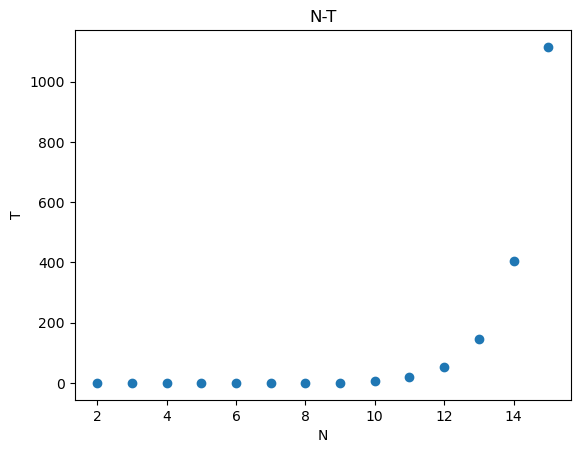

In [11]:
N = np.array(N, dtype=np.int32)
T = np.array(T, dtype=np.float64)
logT = np.log(T)
plt.scatter(N, T)  
plt.title('N-T')  
plt.xlabel('N')  
plt.ylabel('T')  
plt.savefig("N-T") 
plt.show() 

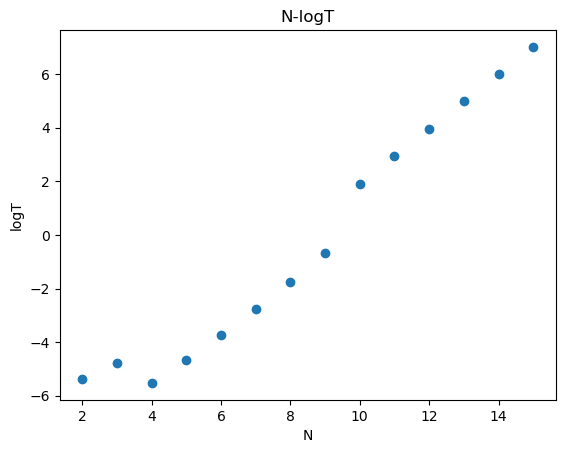

In [12]:
plt.scatter(N, logT)  
  
# 添加标题和坐标轴标签  
plt.title('N-logT')  
plt.xlabel('N')  
plt.ylabel('logT')  
plt.savefig("N-logT") 
# 显示图形  
plt.show()  
